<a href="https://colab.research.google.com/github/prabindebnath25/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# Loading and inspection of the data

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
!pip install CatBoost
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_curve
import time


import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
path = 'https://github.com/prabindebnath25/Credit-Card-Default-Prediction/blob/main/default%20of%20credit%20card%20clients.xls?raw=true'

In [ ]:
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df=pd.read_excel(path, header = 1)

## **Detailed Data Description:**
## **> Basic User Data.**
* **ID :** Unique ID of each client.
* **LIMIT_BAL :** Amount of the given credit (NT dollar) : it includes both the individual consumer credit and his/her family (supplementary) credit.
* **SEX :**  Gender (1 = male; 2 = female).
* **EDUCATION :** Qualifications (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* **MARRIAGE :** Marital status (1 = married; 2 = single; 3 = others).
* **AGE :** Age of the client (years)

## > **History of Past Payment.**
**Scale for PAY_0 to PAY_6 :** (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

* **PAY_0 :** Repayment status in September, 2005 (scale same as above)
* **PAY_2 :** Repayment status in August, 2005 (scale same as above)
* **PAY_3 :** Repayment status in July, 2005 (scale same as above)
* **PAY_4 :** Repayment status in June, 2005 (scale same as above)
* **PAY_5 :** Repayment status in May, 2005 (scale same as above)
* **PAY_6 :** Repayment status in April, 2005 (scale same as above)

## > **Amount of Bill Statement.**
* **BILL_AMT1 :** Amount of bill statement in September, 2005 (NT dollar)
* **BILL_AMT2 :** Amount of bill statement in August, 2005 (NT dollar)
* **BILL_AMT3 :** Amount of bill statement in July, 2005 (NT dollar)
* **BILL_AMT4 :** Amount of bill statement in June, 2005 (NT dollar)
* **BILL_AMT5 :** Amount of bill statement in May, 2005 (NT dollar)
* **BILL_AMT6 :** Amount of bill statement in April, 2005 (NT dollar)

## > **Amount of Previous Payment.**
* **PAY_AMT1 :** Amount of previous payment in September, 2005 (NT dollar)
* **PAY_AMT2 :** Amount of previous payment in August, 2005 (NT dollar)
* **PAY_AMT3 :** Amount of previous payment in July, 2005 (NT dollar)
* **PAY_AMT4 :** Amount of previous payment in June, 2005 (NT dollar)
* **PAY_AMT5 :** Amount of previous payment in May, 2005 (NT dollar)
* **PAY_AMT6 :** Amount of previous payment in April, 2005 (NT dollar)

## >  **Response Variable.**
* **default payment next month :** Default payment (1=yes, 0=no)


In [ ]:
df.head().T

,0,1,2,3,4
ID,1,2,3,4,5
LIMIT_BAL,20000,120000,90000,50000,50000
SEX,2,2,2,2,1
EDUCATION,2,2,2,2,2
MARRIAGE,1,2,2,1,1
AGE,24,26,34,37,57
PAY_0,2,-1,0,0,-1
PAY_2,2,2,0,0,0
PAY_3,-1,0,0,0,-1
PAY_4,-1,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


* **There are 30000 rows and 25 columns in the given data.**
* **There are no duplicate and null values present.**
* **We will have to rename few variables to understand them easily.**


In [ ]:
# we drop the column ID
df.drop('ID', axis=1, inplace= True)

In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

# EDA and Feature Engineering

Renameing few columns

In [ ]:
# Creating columns names for easy understanding 

month = ['September','August','July', 'June', 'May', 'April']

PAY_month = ['PAY_' + i for i in month]
BILL_AMT_month = ['BILL_AMT_' + i for i in month]
PAY_AMT_month = ['PAY_AMT_'+ i for i in month]

PAY = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
BILL_AMT = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PAY_AMT = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [ ]:
# Creating a dictionary
columns = {}
for i in range(len(PAY)):
    columns[PAY[i]] = PAY_month[i]
    columns[BILL_AMT[i]] = BILL_AMT_month[i]
    columns[PAY_AMT[i]] = PAY_AMT_month[i]
    
columns

{'PAY_0': 'PAY_September',
 'BILL_AMT1': 'BILL_AMT_September',
 'PAY_AMT1': 'PAY_AMT_September',
 'PAY_2': 'PAY_August',
 'BILL_AMT2': 'BILL_AMT_August',
 'PAY_AMT2': 'PAY_AMT_August',
 'PAY_3': 'PAY_July',
 'BILL_AMT3': 'BILL_AMT_July',
 'PAY_AMT3': 'PAY_AMT_July',
 'PAY_4': 'PAY_June',
 'BILL_AMT4': 'BILL_AMT_June',
 'PAY_AMT4': 'PAY_AMT_June',
 'PAY_5': 'PAY_May',
 'BILL_AMT5': 'BILL_AMT_May',
 'PAY_AMT5': 'PAY_AMT_May',
 'PAY_6': 'PAY_April',
 'BILL_AMT6': 'BILL_AMT_April',
 'PAY_AMT6': 'PAY_AMT_April'}

In [ ]:
# Renaming the columns
df.rename(columns = columns, inplace = True)
df.rename(columns = {'default payment next month' : 'Defaulters'}, inplace = True)


In [ ]:
# Changed Column Names
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_September',
       'PAY_August', 'PAY_July', 'PAY_June', 'PAY_May', 'PAY_April',
       'BILL_AMT_September', 'BILL_AMT_August', 'BILL_AMT_July',
       'BILL_AMT_June', 'BILL_AMT_May', 'BILL_AMT_April', 'PAY_AMT_September',
       'PAY_AMT_August', 'PAY_AMT_July', 'PAY_AMT_June', 'PAY_AMT_May',
       'PAY_AMT_April', 'Defaulters'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   LIMIT_BAL           30000 non-null  int64
 1   SEX                 30000 non-null  int64
 2   EDUCATION           30000 non-null  int64
 3   MARRIAGE            30000 non-null  int64
 4   AGE                 30000 non-null  int64
 5   PAY_September       30000 non-null  int64
 6   PAY_August          30000 non-null  int64
 7   PAY_July            30000 non-null  int64
 8   PAY_June            30000 non-null  int64
 9   PAY_May             30000 non-null  int64
 10  PAY_April           30000 non-null  int64
 11  BILL_AMT_September  30000 non-null  int64
 12  BILL_AMT_August     30000 non-null  int64
 13  BILL_AMT_July       30000 non-null  int64
 14  BILL_AMT_June       30000 non-null  int64
 15  BILL_AMT_May        30000 non-null  int64
 16  BILL_AMT_April      30000 non-null  int6

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_September,PAY_August,PAY_July,PAY_June,PAY_May,...,BILL_AMT_June,BILL_AMT_May,BILL_AMT_April,PAY_AMT_September,PAY_AMT_August,PAY_AMT_July,PAY_AMT_June,PAY_AMT_May,PAY_AMT_April,Defaulters
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Checking for outliers and deal with them

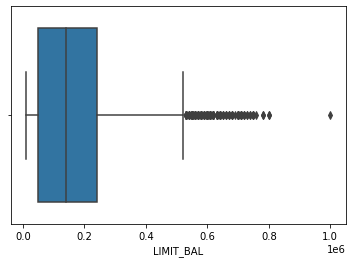

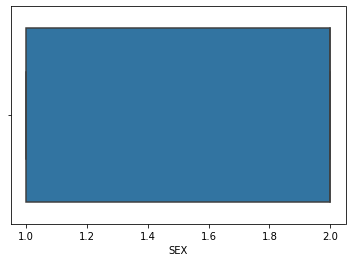

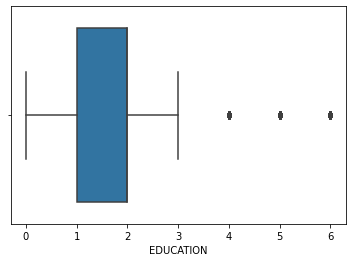

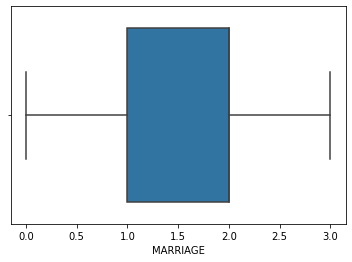

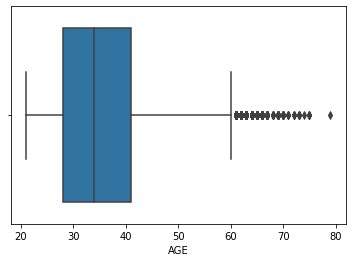

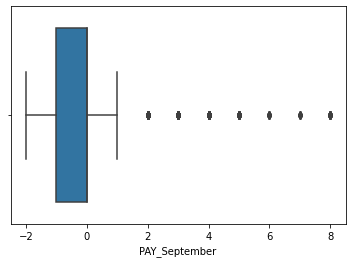

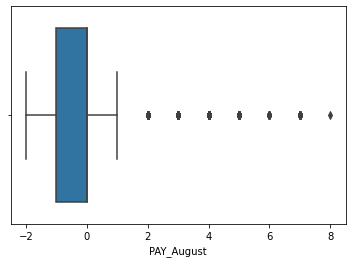

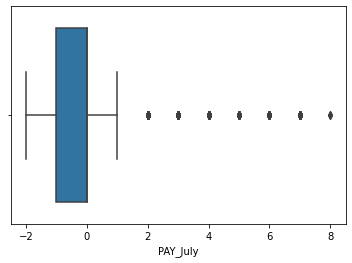

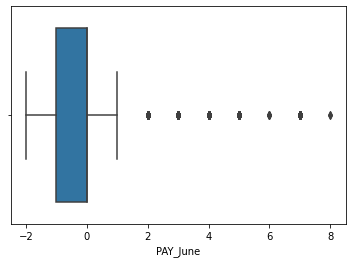

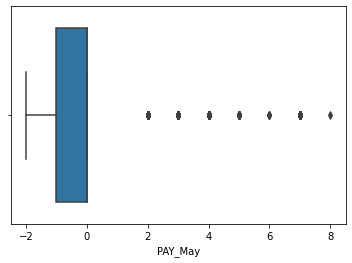

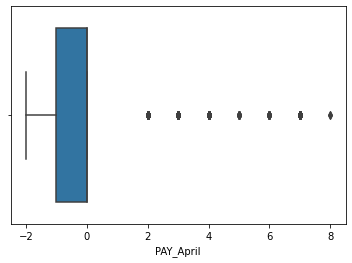

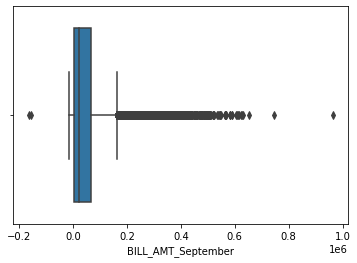

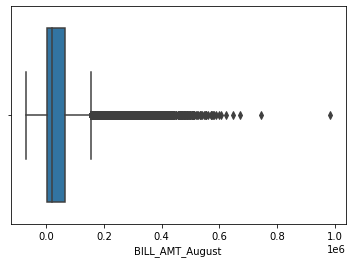

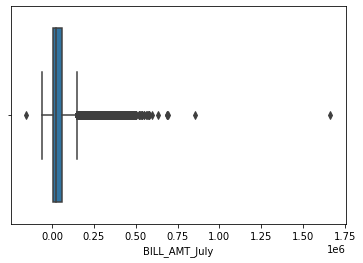

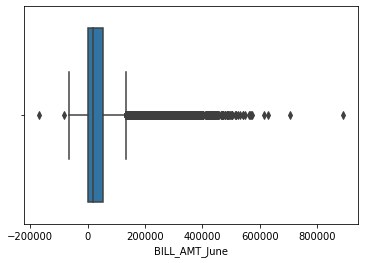

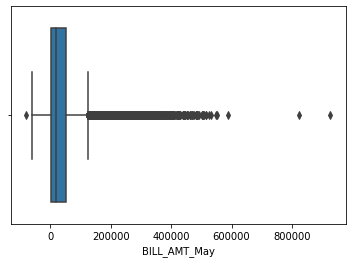

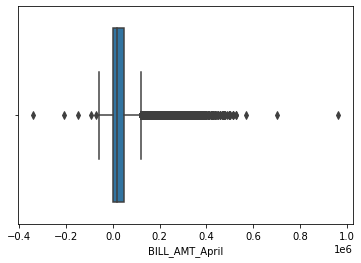

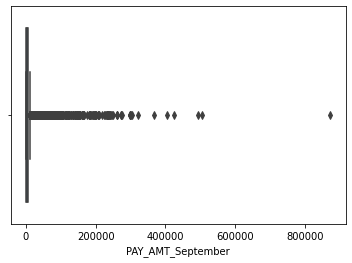

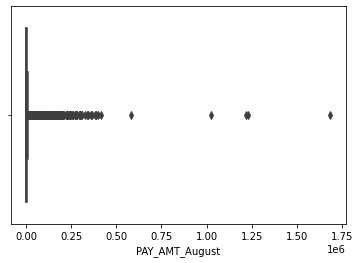

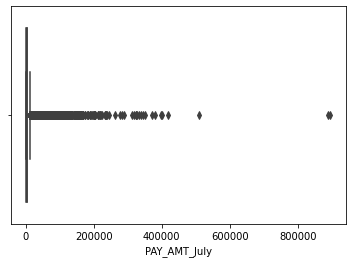

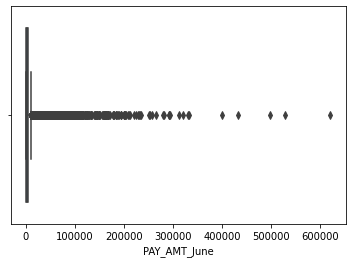

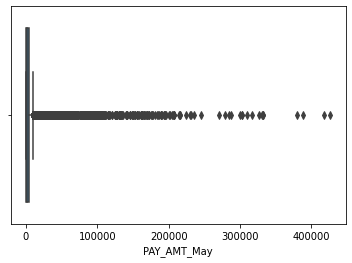

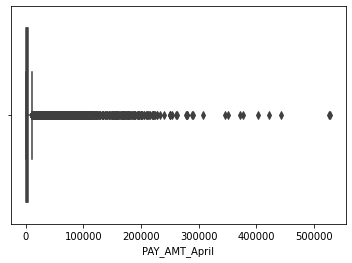

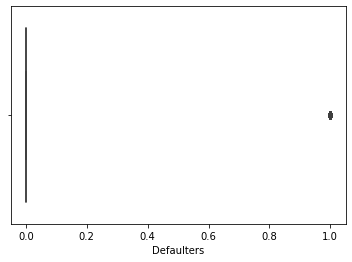

In [ ]:
# Creating boxplot for each columns
for i in df.describe().columns:
    plt.figure.figsize= (15,5)
    sns.boxplot(df[i])
    plt.show()
    

## now we find the outliers useing the isolation forest techenique

In [ ]:
# feature scaleing
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
scaled_df = scale.fit_transform(df.drop(columns= ['Defaulters']))

In [ ]:
# Outliers detection useing isolation forest algorithm
from sklearn.ensemble import IsolationForest

In [ ]:
isolation_model = IsolationForest(n_estimators= 100, contamination = .01, random_state= 0)
isolation_model.fit(scaled_df)

IsolationForest(contamination=0.01, random_state=0)

In [ ]:
df['multivariate_anomaly_score'] = isolation_model.decision_function(scaled_df)
df['multivariate_outliers'] = isolation_model.predict(scaled_df)

In [ ]:
df['multivariate_outliers'].value_counts()

 1    29700
-1      300
Name: multivariate_outliers, dtype: int64

In [ ]:
df[df['multivariate_outliers'] == -1]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_September,PAY_August,PAY_July,PAY_June,PAY_May,...,BILL_AMT_April,PAY_AMT_September,PAY_AMT_August,PAY_AMT_July,PAY_AMT_June,PAY_AMT_May,PAY_AMT_April,Defaulters,multivariate_anomaly_score,multivariate_outliers
6,500000,1,1,2,29,0,0,0,0,0,...,473944,55000,40000,38000,20239,13750,13770,0,-0.051680,-1
59,400000,2,2,1,29,0,0,0,0,0,...,364089,17000,15029,30000,12000,12000,23000,0,-0.015094,-1
102,480000,1,1,1,63,0,0,0,2,2,...,469961,16078,55693,17000,0,18000,24200,0,-0.078952,-1
214,470000,1,2,2,27,2,2,2,2,0,...,309959,13000,11001,0,10484,10838,10367,0,-0.024130,-1
360,500000,2,2,2,23,4,3,2,0,0,...,419643,10000,0,14000,16500,16000,19000,1,-0.073918,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29605,500000,1,1,1,37,0,0,2,0,0,...,356636,40024,325,15296,12137,12312,14113,0,-0.047464,-1
29820,400000,1,2,2,37,1,-1,0,0,0,...,271385,423903,15100,14600,13000,9500,9500,0,-0.057618,-1
29837,500000,1,1,2,34,0,0,0,0,0,...,424592,17438,18852,16673,15244,15216,16037,0,-0.032132,-1
29883,420000,1,1,1,34,0,0,0,0,0,...,489200,20000,24000,11000,10000,0,11000,0,-0.028768,-1


In [ ]:
# Percentage of data detected as outliers
len(df[df['multivariate_outliers'] == -1])/df.shape[0]

0.01

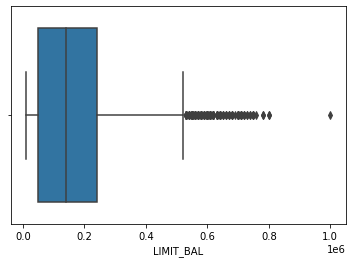

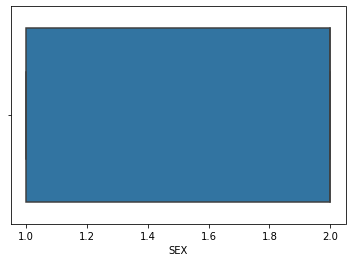

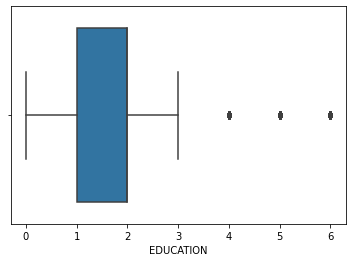

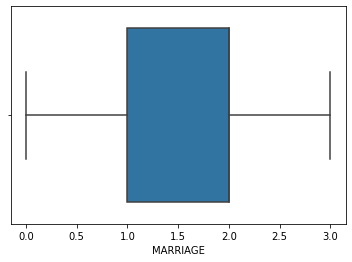

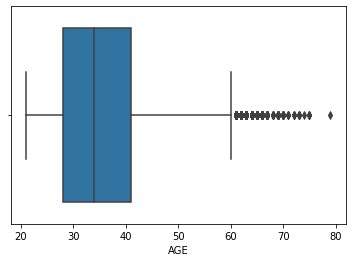

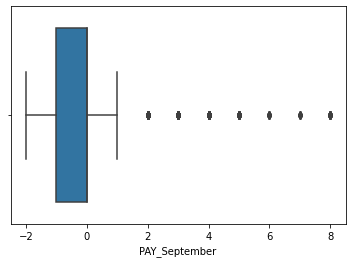

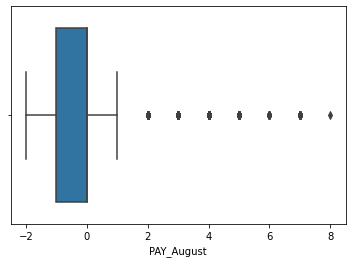

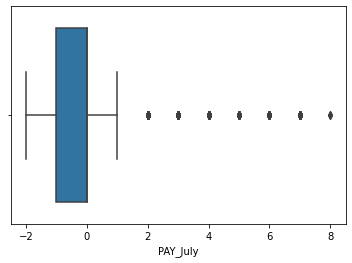

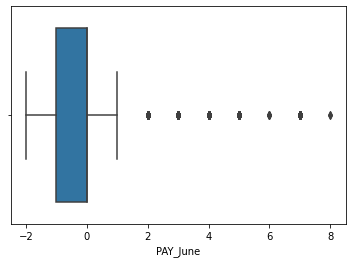

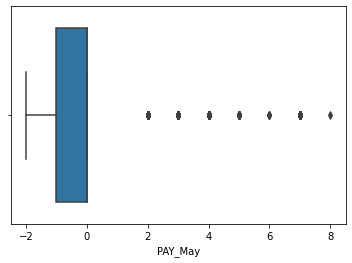

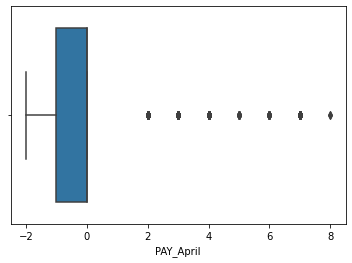

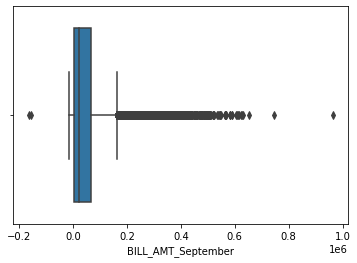

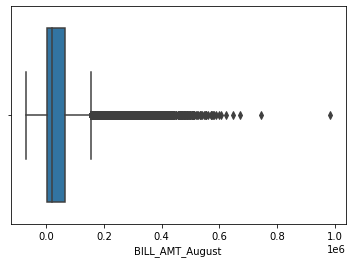

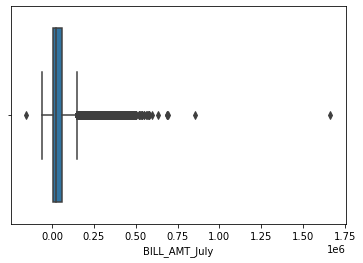

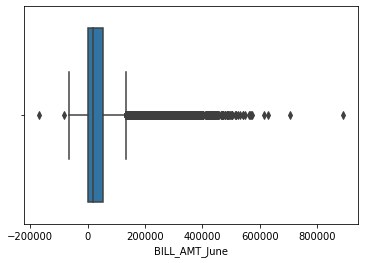

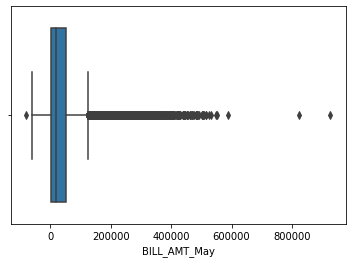

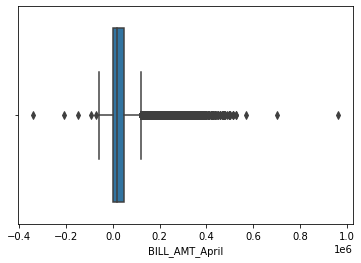

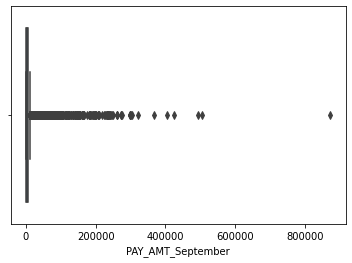

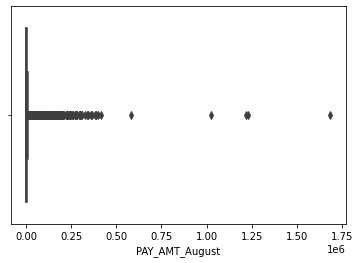

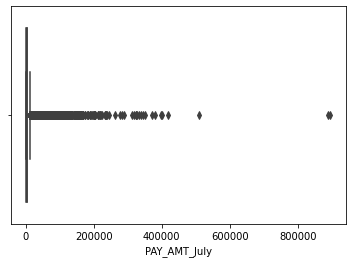

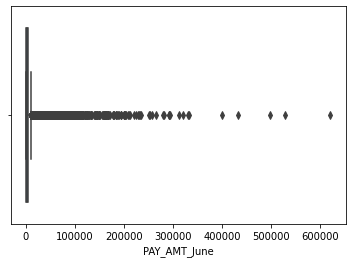

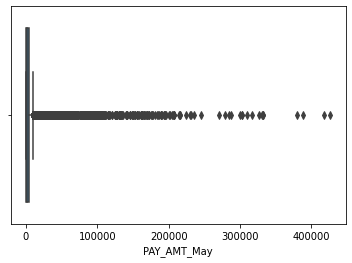

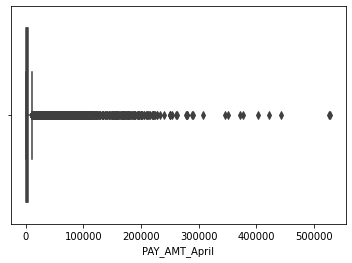

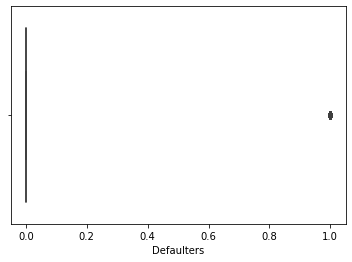

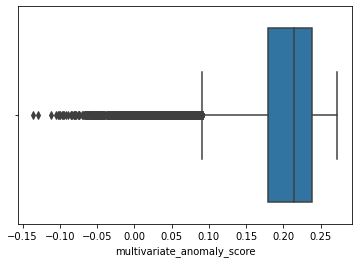

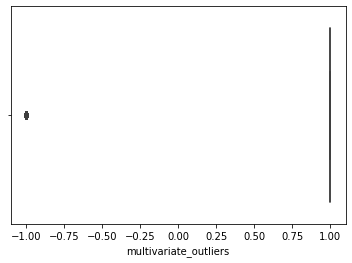

In [ ]:
for i in df[df['multivariate_outliers'] != -1].describe().columns:
    plt.figure.figsize= (15,5)
    sns.boxplot(df[i])
    plt.show()

In [ ]:
# Removing outliers 
df = df[df['multivariate_outliers'] == 1]

In [ ]:
df.shape

(29700, 26)

In [ ]:
df.drop(columns = ['multivariate_anomaly_score',
       'multivariate_outliers',], inplace = True)

## **Dependent Variable**: **[default payment next month]**

In [ ]:
#checking dependent valriable
df['Defaulters'].value_counts()

0    23154
1     6546
Name: Defaulters, dtype: int64

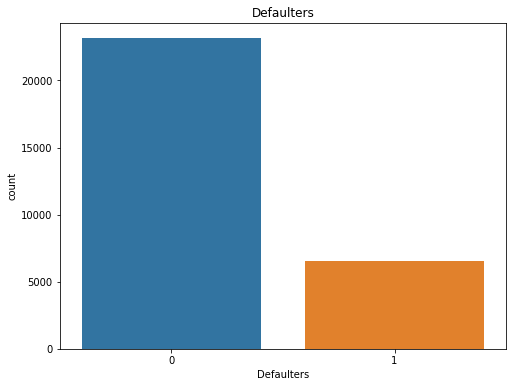

In [ ]:
plt.figure(figsize=(8,6))
defaulter = sns.countplot(df['Defaulters'])
plt.title('Defaulters')
plt.show()

**As we can see there is class imbalance in our response variable.**
> **What is class imbalance?**
* **Class imbalance is a problem in machine learning where the total number of one class of data significantly outnumbers the total number of another class of data.**
* **In our situation class 0 outnumbers class 1, i.e there are very few defaulters in the given data.**

## Bivariate analysis

In [ ]:
# Maping numerical values to catrgorical for easy undeerstanding
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']
df_cat = df[categorical_features]
df_cat.head()

,SEX,EDUCATION,MARRIAGE
0,2,2,1
1,2,2,2
2,2,2,2
3,2,2,1
4,1,2,1


In [ ]:
# Value counts in ['SEX', 'EDUCATION', 'MARRIAGE']
for i in df_cat.columns:
    print(df[i].value_counts(), '\n')

2    17963
1    11737
Name: SEX, dtype: int64 

2    13922
1    10437
3     4885
5      271
4      123
6       48
0       14
Name: EDUCATION, dtype: int64 

2    15838
1    13486
3      322
0       54
Name: MARRIAGE, dtype: int64 



In [ ]:
# X2: Gender (1 = male; 2 = female).
# X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
# X4: Marital status (1 = married; 2 = single; 3 = others).

In [ ]:
df_cat['SEX'] = df_cat['SEX'].map({1: 'male', 2: 'female'})
df_cat['EDUCATION'] = df_cat['EDUCATION'].map({1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others', 5 : 'others', 6 : 'others', 0 : 'others'})
df_cat['MARRIAGE'] = df_cat['MARRIAGE'].map({1 : 'married', 2 : 'single', 3 : 'others', 0 : 'otheres'})

In [ ]:
df_cat['Defaulters'] = df['Defaulters']

In [ ]:
df_cat

,SEX,EDUCATION,MARRIAGE,Defaulters
0,female,university,married,1
1,female,university,single,1
2,female,university,single,0
3,female,university,married,0
4,male,university,married,0
...,...,...,...,...
29995,male,high school,married,0
29996,male,high school,single,0
29997,male,university,single,1
29998,male,high school,married,1


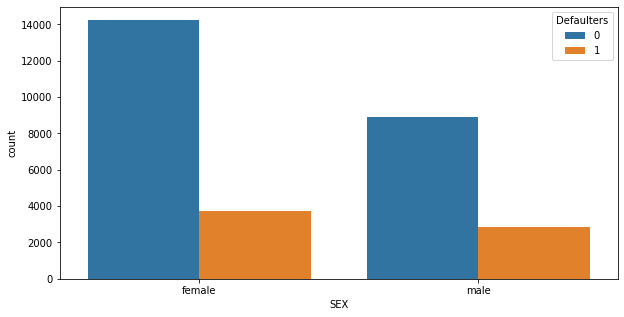

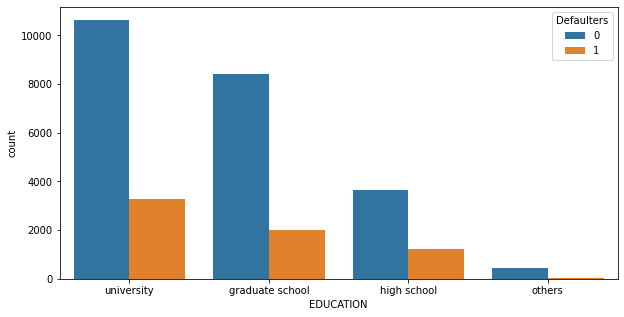

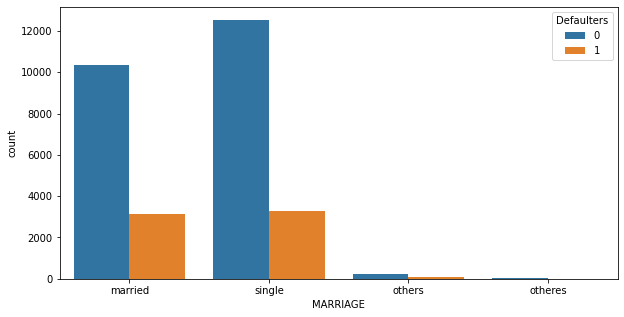

In [ ]:
for i in df_cat.columns[:-1]:
    plt.figure(figsize= (10,5))
    sns.countplot(df_cat[i], hue= df['Defaulters'])
    plt.show()
    print('\n')

In [ ]:
df_cat.columns

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'Defaulters'], dtype='object')

<Figure size 864x576 with 0 Axes>

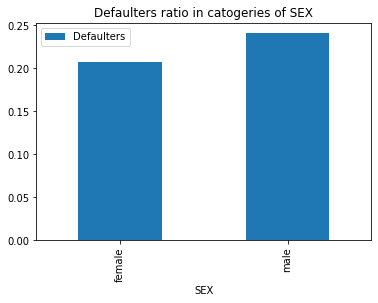

<Figure size 864x576 with 0 Axes>

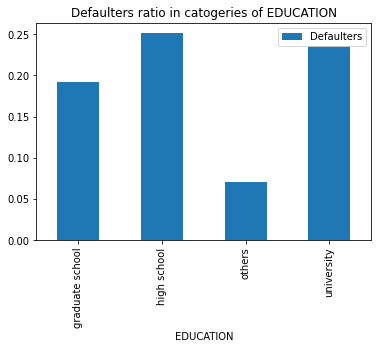

<Figure size 864x576 with 0 Axes>

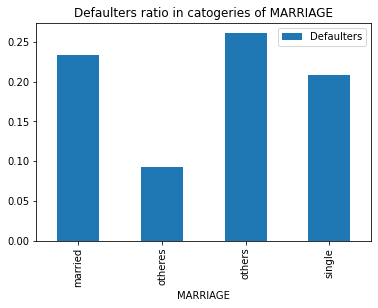

In [ ]:
#percentage of defaulters in each category
for i in df_cat.columns[:-1]:
    plt.figure(figsize=(12,8))
    df_cat[['Defaulters', i]].groupby(i).mean().plot(kind = 'bar')
    plt.title(f"Defaulters ratio in catogeries of {i}")
    plt.show()



**observation**

for Sex feature:
  - we can see that  number of females are more than the males
  - but the default ratio of male is quite higher than female

for Education feature:
  - university and High School pesons are more likely to be defaulter in comparison with  the graduate school persons.

for Marriage feature:
  - people who are not married nor single are more likely to make default of bills in comparison with single and married person

## AGE

In [ ]:
# lets now look at the age value
df['AGE'].describe()

count    29700.000000
mean        35.435455
std          9.198810
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         75.000000
Name: AGE, dtype: float64

- we can see here min age is 21 and maximum age is 79 in our dataset

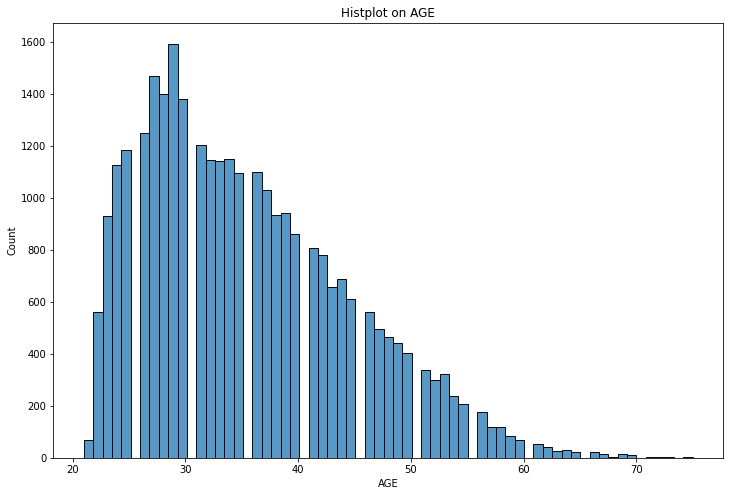

In [ ]:
# Hist plot of number of people in different ages 
plt.figure(figsize=(12,8))
sns.histplot(df['AGE'])
plt.title("Histplot on AGE")
plt.show()

In [ ]:
# creating function to create the cohort for age group
def age_group(age):
  if age in range(21,31) : # starting from 21 because minimum age is 21 in our dataset
    return '21-30'
  elif age in range(31,41) :
    return '31-40'
  elif age in range(41,51) :
    return '41-50'
  elif age in range(51,61) :
    return '51-60'
  else:
    return '60 & above'

In [ ]:
# Creating a new columns named age group useing the abobe function
df['age_group'] = df['AGE'].apply(age_group)

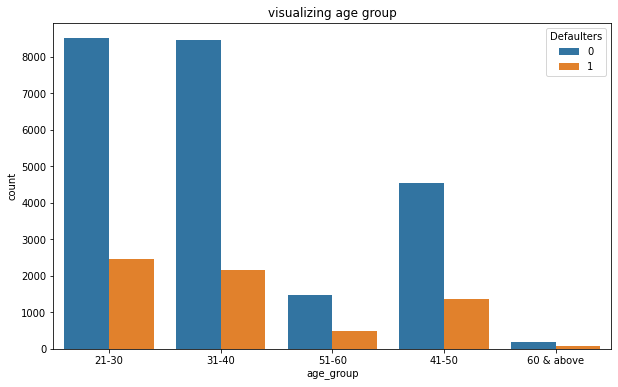

In [ ]:
# visualizing age group
plt.figure(figsize=(10,6))
sns.countplot(df['age_group'], hue = df['Defaulters'])
plt.title("visualizing age group")
plt.show()

- In aur dataset we can clearly see that most of the credit card holder are of age between 21 to 40 , so we can say that company's target customer are mostly youngster.


<Figure size 720x432 with 0 Axes>

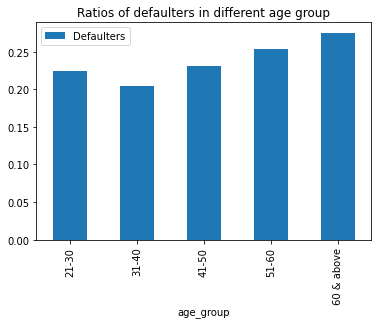

In [ ]:
# visualizing ratio of defaulters in different age group
plt.figure(figsize=(10,6))
(df[['age_group', 'Defaulters']].groupby('age_group').mean()).plot(kind = 'bar')
plt.title("Ratios of defaulters in different age group")
plt.show()

* we can clearly see that as the age incearse , chances of the default increase as higher age persons has more default ratio.

##Payment and bills description

In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_September',
       'PAY_August', 'PAY_July', 'PAY_June', 'PAY_May', 'PAY_April',
       'BILL_AMT_September', 'BILL_AMT_August', 'BILL_AMT_July',
       'BILL_AMT_June', 'BILL_AMT_May', 'BILL_AMT_April', 'PAY_AMT_September',
       'PAY_AMT_August', 'PAY_AMT_July', 'PAY_AMT_June', 'PAY_AMT_May',
       'PAY_AMT_April', 'Defaulters', 'age_group'],
      dtype='object')

In [ ]:
# Payment delay description
df[['PAY_September', 'PAY_August', 'PAY_July', 'PAY_June', 'PAY_May', 'PAY_April']].describe()

,PAY_September,PAY_August,PAY_July,PAY_June,PAY_May,PAY_April
count,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000
mean,-0.023266,-0.140572,-0.172492,-0.226296,-0.271549,-0.296498
std,1.113858,1.189198,1.192044,1.166326,1.131761,1.148976
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


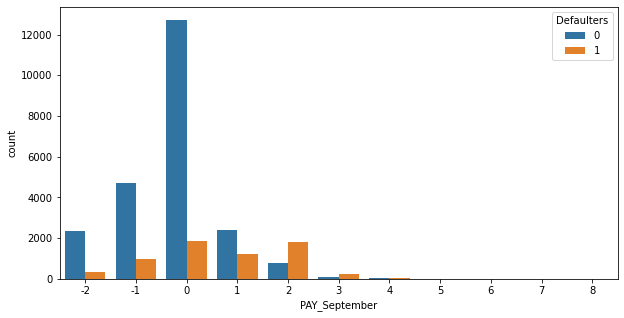

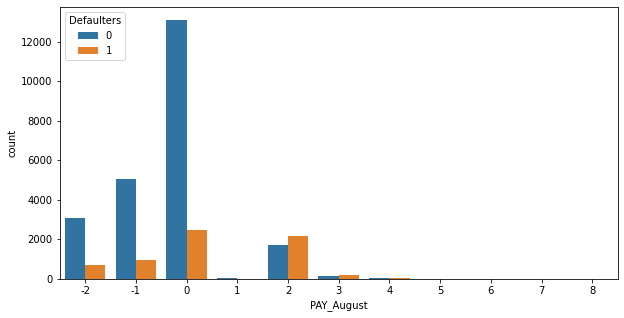

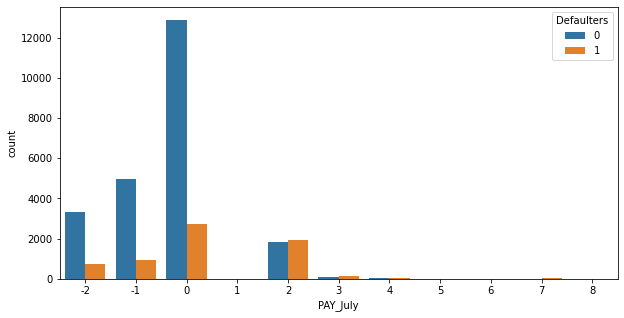

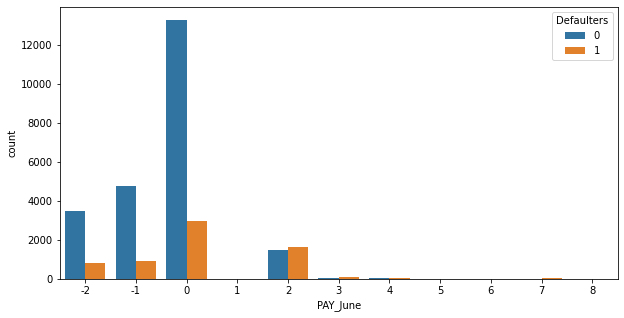

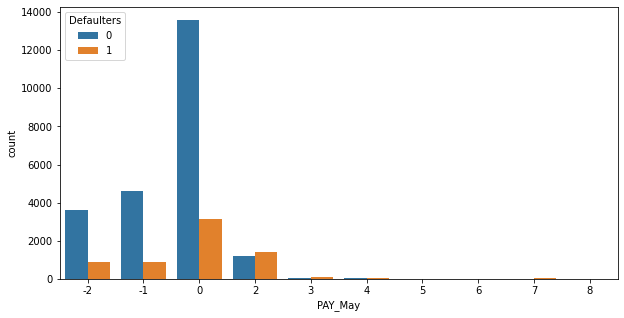

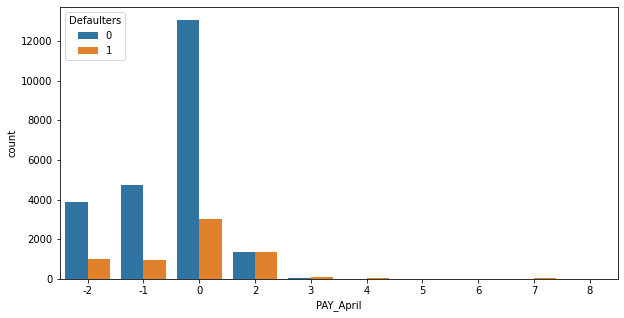

In [ ]:
pay_col = ['PAY_September', 'PAY_August', 'PAY_July', 'PAY_June', 'PAY_May', 'PAY_April']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'Defaulters', data = df)

In [ ]:
#Previous Payment Description
df[['PAY_AMT_September',       'PAY_AMT_August', 'PAY_AMT_July', 'PAY_AMT_June', 'PAY_AMT_May',       'PAY_AMT_April']].describe()

,PAY_AMT_September,PAY_AMT_August,PAY_AMT_July,PAY_AMT_June,PAY_AMT_May,PAY_AMT_April
count,29700.000000,2.970000e+04,29700.000000,29700.000000,29700.000000,29700.000000
mean,5358.378047,5.406675e+03,4904.933434,4599.478047,4561.223973,4826.430943
std,14280.856685,1.613122e+04,14758.116252,14559.000559,14159.246540,15665.870251
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,990.000000,8.157500e+02,390.000000,283.750000,237.750000,100.000000
50%,2100.000000,2.000000e+03,1791.000000,1500.000000,1500.000000,1500.000000
75%,5000.000000,5.000000e+03,4360.000000,4000.000000,4000.000000,4000.000000
max,505000.000000,1.024516e+06,417588.000000,528897.000000,426529.000000,528666.000000


In [ ]:
# Bill Statement description
df[[ 'BILL_AMT_September', 'BILL_AMT_August', 'BILL_AMT_July', 'BILL_AMT_June', 'BILL_AMT_May', 'BILL_AMT_April']].describe()

,BILL_AMT_September,BILL_AMT_August,BILL_AMT_July,BILL_AMT_June,BILL_AMT_May,BILL_AMT_April
count,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000
mean,48179.994916,46164.947912,43873.935421,40258.277104,37494.355690,36265.737104
std,65642.197006,62954.356763,60427.570373,55956.697295,52716.217836,52097.663795
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3457.750000,2895.500000,2551.000000,2250.000000,1699.750000,1200.000000
50%,21706.000000,20650.000000,19779.500000,18783.000000,17860.000000,16703.500000
75%,64829.000000,61729.750000,58425.500000,52032.000000,49123.750000,48278.500000
max,746814.000000,512650.000000,855086.000000,628699.000000,514114.000000,499100.000000


# Limit Balance

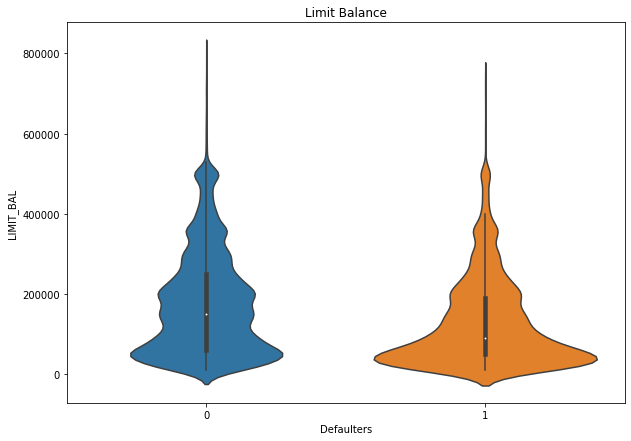

In [ ]:
plt.figure(figsize=(10,7))
sns.violinplot(x ='Defaulters',y ='LIMIT_BAL', data = df)
plt.title('Limit Balance')
plt.show()

* **LIMIT_BAL** ranges from **10000 to 1000000** with most of the values **less than or equal to 200000.**
* **Most of DEFAULTS are from users within the LIMIT of 10000 to 50000, DEFAULTS keep on descreasing as the LIMIT gets higher.**
* **This indirectly means than as the LIMIT increases the number of DEFAULTS decreases.**

# Correlation Between Variables:

In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_September',
       'PAY_August', 'PAY_July', 'PAY_June', 'PAY_May', 'PAY_April',
       'BILL_AMT_September', 'BILL_AMT_August', 'BILL_AMT_July',
       'BILL_AMT_June', 'BILL_AMT_May', 'BILL_AMT_April', 'PAY_AMT_September',
       'PAY_AMT_August', 'PAY_AMT_July', 'PAY_AMT_June', 'PAY_AMT_May',
       'PAY_AMT_April', 'Defaulters', 'age_group'],
      dtype='object')

In [ ]:
X = df.drop(columns = ['Defaulters'])

In [ ]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_September,PAY_August,PAY_July,PAY_June,PAY_May,...,BILL_AMT_June,BILL_AMT_May,BILL_AMT_April,PAY_AMT_September,PAY_AMT_August,PAY_AMT_July,PAY_AMT_June,PAY_AMT_May,PAY_AMT_April,age_group
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,21-30
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,21-30
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,31-40
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,31-40
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,51-60


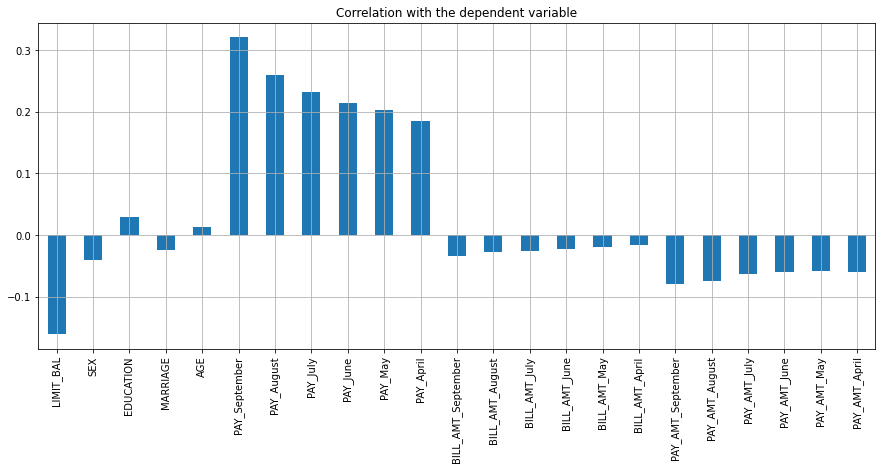

In [ ]:
plt.figure(figsize=(15,7))
X.corrwith(df['Defaulters']).plot.bar(figsize = (15, 6), grid = True)
plt.title('Correlation with the dependent variable')
plt.show()

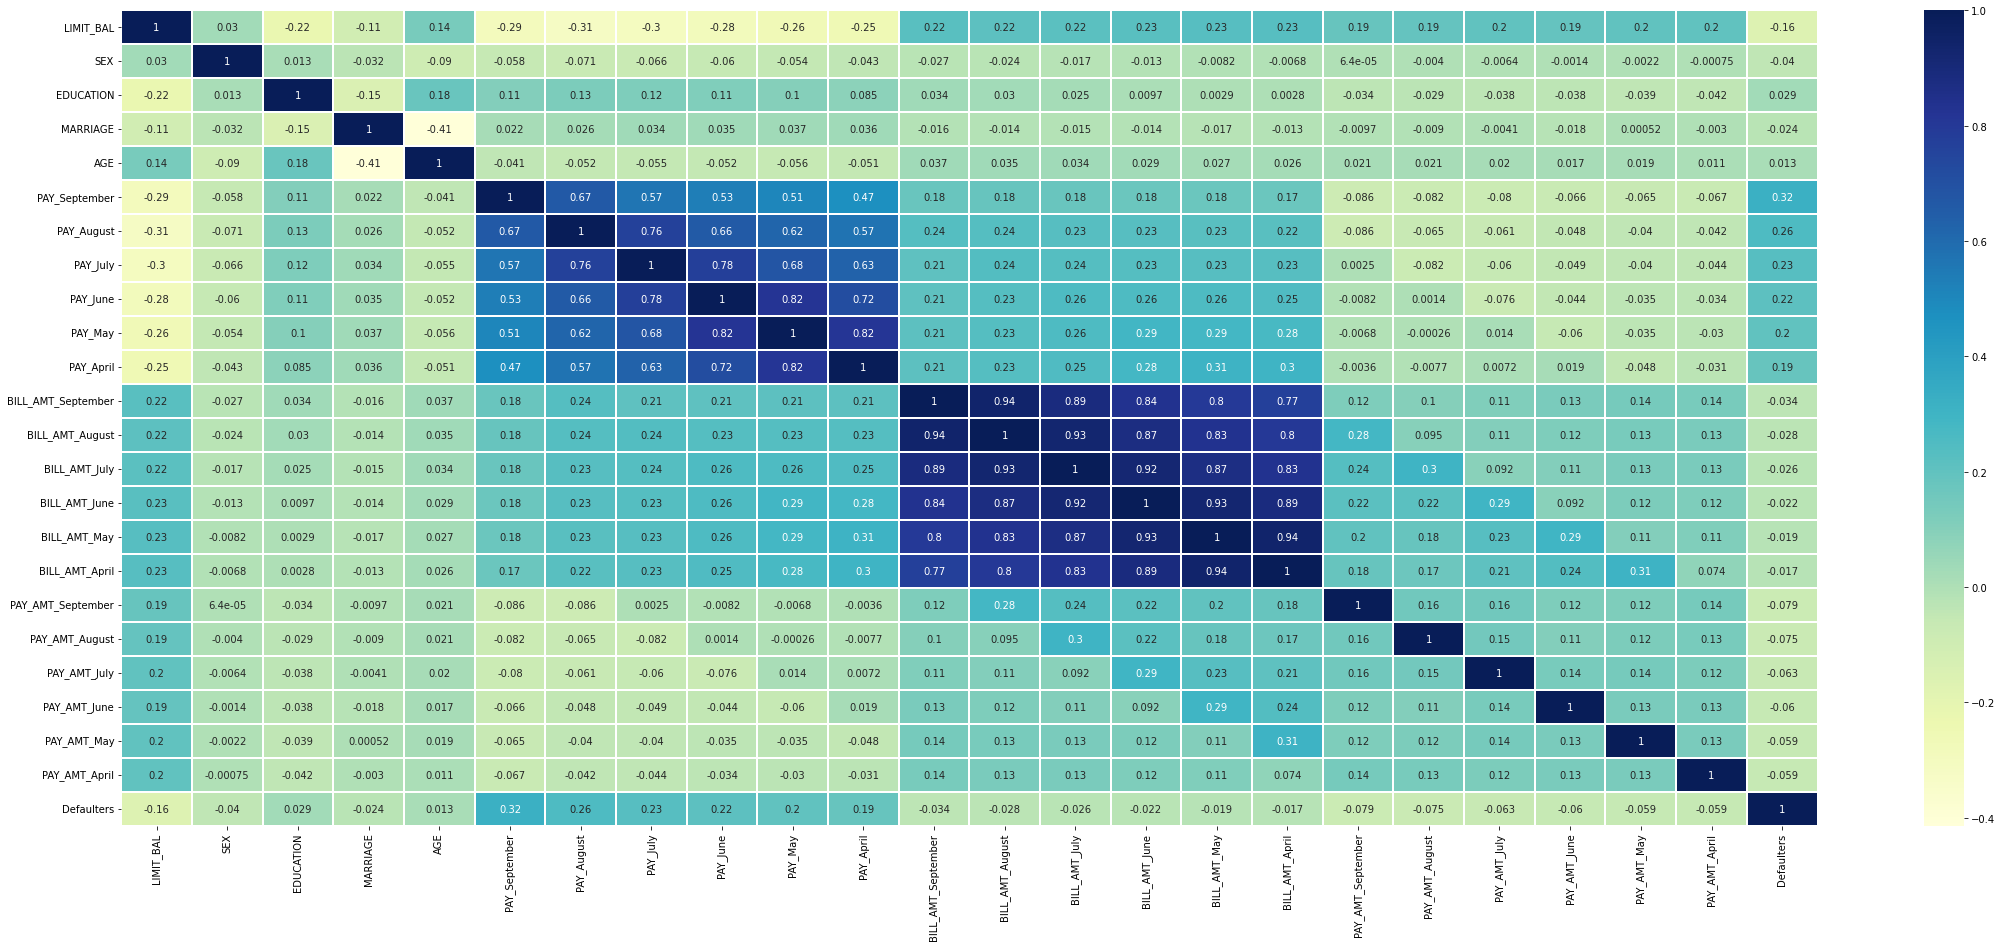

In [ ]:
# Check correlation between variables using Heatmap. [id not included.]
corr_data = df.corr()
plt.figure(figsize=(38,15))
sns.heatmap(corr_data, annot=True, linewidths=1, cmap='YlGnBu')
plt.show()

* **Details of past payments show more correlation with the dependent variable.**
* **Education and Age also show a positive correlation, whereas most of the other variables either show no or negative correlation.**
* **Multicollinearity exists between variables of History of past payment.**
* **Multicollinearity exists between variables of Amount of Bill Statement.**


# Data Preparation:

In [ ]:
# we first drop the columns age
df.drop('AGE', axis = 1, inplace= True)

In [ ]:
X = df.drop('Defaulters', axis = 1)

In [ ]:
y = df['Defaulters']

In [ ]:
X['SEX'] = X['SEX'].map({1: 'male', 2: 'female'})
X['EDUCATION'] = X['EDUCATION'].map({1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others', 5 : 'others', 6 : 'others', 0 : 'others'})
X['MARRIAGE'] = X['MARRIAGE'].map({1 : 'married', 2 : 'single', 3 : 'others', 0 : 'otheres'})

In [ ]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_September,PAY_August,PAY_July,PAY_June,PAY_May,PAY_April,...,BILL_AMT_June,BILL_AMT_May,BILL_AMT_April,PAY_AMT_September,PAY_AMT_August,PAY_AMT_July,PAY_AMT_June,PAY_AMT_May,PAY_AMT_April,age_group
0,20000,female,university,married,2,2,-1,-1,-2,-2,...,0,0,0,0,689,0,0,0,0,21-30
1,120000,female,university,single,-1,2,0,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,21-30
2,90000,female,university,single,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,31-40
3,50000,female,university,married,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,31-40
4,50000,male,university,married,-1,0,-1,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,51-60


In [ ]:
# one hot encoding for age group
X=pd.get_dummies(X, drop_first = True)

In [ ]:
X.columns


Index(['LIMIT_BAL', 'PAY_September', 'PAY_August', 'PAY_July', 'PAY_June',
       'PAY_May', 'PAY_April', 'BILL_AMT_September', 'BILL_AMT_August',
       'BILL_AMT_July', 'BILL_AMT_June', 'BILL_AMT_May', 'BILL_AMT_April',
       'PAY_AMT_September', 'PAY_AMT_August', 'PAY_AMT_July', 'PAY_AMT_June',
       'PAY_AMT_May', 'PAY_AMT_April', 'SEX_male', 'EDUCATION_high school',
       'EDUCATION_others', 'EDUCATION_university', 'MARRIAGE_otheres',
       'MARRIAGE_others', 'MARRIAGE_single', 'age_group_31-40',
       'age_group_41-50', 'age_group_51-60', 'age_group_60 & above'],
      dtype='object')

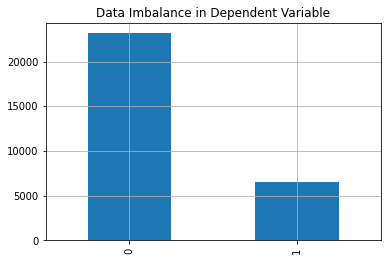

In [ ]:
# Now lets check the imbalance in our dependent varieble.
y.value_counts().plot(kind = 'bar', grid = True)
plt.title('Data Imbalance in Dependent Variable')
plt.show()

*  **The above two plots show how imbalanced our data is.** 
* **Class_1 i.e the number of DEFAULTS is relatively lower than NON-DEFAULTS, this is normal as DEFAULTS do not happen on a regular basis.**

## Since the data is inbalanced we use SMOTE(Synthetic Minority Oversampling Technique)

In [ ]:
#importing SMote to make our dataset balanced
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X,y)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 29700
Resampled dataset shape 46308


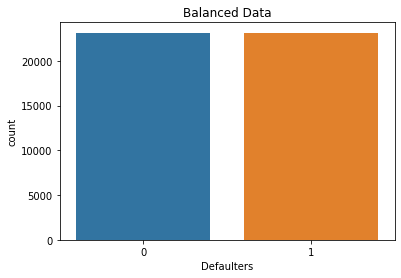

In [ ]:
# We now plot the balanced data
plot = sns.countplot(y_smote)
plt.title('Balanced Data')
plt.show()


## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#spliting data set into train and test dataset
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.25,random_state=101)

In [ ]:
X_train.T

,33806,29971,453,21399,1652,38090,44875,6166,28855,43116,...,22056,17357,32137,20463,12363,5695,8006,17745,17931,45919
LIMIT_BAL,301978,20000,180000,100000,290000,50000,85226,80000,30000,50000,...,280000,50000,50000,10000,70000,30000,200000,10000,100000,50000
PAY_September,2,1,0,1,-1,0,1,0,2,1,...,0,0,1,-1,0,0,-1,3,0,2
PAY_August,0,0,0,2,-1,0,1,0,2,0,...,0,0,2,-1,0,0,-1,2,0,2
PAY_July,0,0,0,0,-1,0,1,0,2,0,...,0,2,2,-1,0,0,0,2,0,2
PAY_June,0,1,0,0,-1,0,-1,0,0,0,...,0,2,3,-1,0,0,0,3,0,2
PAY_May,1,1,0,0,-1,0,0,0,0,0,...,0,0,2,0,0,0,0,3,0,2
PAY_April,1,-2,0,2,0,0,0,0,0,0,...,0,0,2,0,0,0,0,3,0,2
BILL_AMT_September,134807,15007,152510,7127,1520,48741,89523,70664,27943,39134,...,266030,17102,20366,576,49169,23819,1674,1050,81210,41010
BILL_AMT_August,138528,16869,151651,6867,1200,50105,84246,62223,30734,40179,...,264176,19805,19748,3100,48960,15367,7398,1050,78785,42818
BILL_AMT_July,141479,19103,159019,8095,0,41587,83920,26400,28092,41199,...,267668,21188,22751,3629,49864,10159,6867,1050,69138,44414


In [ ]:
#Scaling Feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

# Check performence of different models useing loop

In [ ]:
# Defining the models to be used.
models = [
            ['LogisticRegression', LogisticRegression()],
            ['DecisionTreeClassifier', DecisionTreeClassifier()],
            ['RandomForestClassifier', RandomForestClassifier()],
            ['XGBClassifier', XGBClassifier()],
            ['CatBoostClassifier', CatBoostClassifier()],
          ]

# creating a loop to train all the models and get eveluation metrics
model_eveluation_metrices =[]
for name, model in models:
    working_model ={}
    working_model['name'] = name
    start = time.time()
    model.fit(scaled_X_train, y_train)
    stop = time.time()
    working_model['train_time'] = stop - start

    y_train_pred = model.predict(scaled_X_train)
    y_test_pred = model.predict(scaled_X_test)

    working_model["Train_accuracy_score"] = accuracy_score(y_train, y_train_pred)
    working_model["Test_accuracy_score"] = accuracy_score(y_test, y_test_pred)
    working_model["Train_precision_score"] = precision_score(y_train, y_train_pred)
    working_model["Test_precision_score"] = precision_score(y_test, y_test_pred)
    working_model["Train_recall_score"] = recall_score(y_train, y_train_pred)
    working_model["Test_recall_score"] = recall_score(y_test, y_test_pred)
    working_model["Train_roc_auc_score"] = roc_auc_score(y_train, y_train_pred)
    working_model["Test_roc_auc_score"] = roc_auc_score(y_test, y_test_pred)
    model_eveluation_metrices.append(working_model)


pd.DataFrame(model_eveluation_metrices)

Learning rate set to 0.046862
0:	learn: 0.6740563	total: 66.9ms	remaining: 1m 6s
1:	learn: 0.6570070	total: 111ms	remaining: 55.6s
2:	learn: 0.6415267	total: 153ms	remaining: 50.7s
3:	learn: 0.6278425	total: 209ms	remaining: 52s
4:	learn: 0.6164987	total: 274ms	remaining: 54.5s
5:	learn: 0.6058670	total: 304ms	remaining: 50.3s
6:	learn: 0.5976275	total: 321ms	remaining: 45.5s
7:	learn: 0.5910063	total: 338ms	remaining: 41.9s
8:	learn: 0.5833244	total: 356ms	remaining: 39.2s
9:	learn: 0.5748386	total: 372ms	remaining: 36.9s
10:	learn: 0.5682630	total: 395ms	remaining: 35.5s
11:	learn: 0.5626889	total: 417ms	remaining: 34.3s
12:	learn: 0.5560764	total: 442ms	remaining: 33.6s
13:	learn: 0.5497752	total: 461ms	remaining: 32.4s
14:	learn: 0.5448131	total: 480ms	remaining: 31.5s
15:	learn: 0.5403908	total: 498ms	remaining: 30.7s
16:	learn: 0.5354553	total: 516ms	remaining: 29.8s
17:	learn: 0.5320799	total: 533ms	remaining: 29.1s
18:	learn: 0.5280781	total: 551ms	remaining: 28.5s
19:	learn: 0

,name,train_time,Train_accuracy_score,Test_accuracy_score,Train_precision_score,Test_precision_score,Train_recall_score,Test_recall_score,Train_roc_auc_score,Test_roc_auc_score
0,LogisticRegression,1.155907,0.766261,0.773776,0.773961,0.783583,0.750548,0.761145,0.766221,0.773871
1,DecisionTreeClassifier,1.406302,0.997121,0.776021,0.997171,0.772414,0.997056,0.787380,0.997121,0.775935
2,RandomForestClassifier,12.280188,0.997121,0.855144,0.996140,0.878209,0.998095,0.827160,0.997123,0.855356
3,XGBClassifier,8.529528,0.809392,0.809882,0.830390,0.832692,0.776411,0.779150,0.809310,0.810114
4,CatBoostClassifier,18.191210,0.871959,0.841064,0.896715,0.870178,0.840030,0.804527,0.871879,0.841341


In [ ]:
pd.DataFrame(model_eveluation_metrices)

,name,train_time,Train_accuracy_score,Test_accuracy_score,Train_precision_score,Test_precision_score,Train_recall_score,Test_recall_score,Train_roc_auc_score,Test_roc_auc_score
0,LogisticRegression,1.155907,0.766261,0.773776,0.773961,0.783583,0.750548,0.761145,0.766221,0.773871
1,DecisionTreeClassifier,1.406302,0.997121,0.776021,0.997171,0.772414,0.997056,0.787380,0.997121,0.775935
2,RandomForestClassifier,12.280188,0.997121,0.855144,0.996140,0.878209,0.998095,0.827160,0.997123,0.855356
3,XGBClassifier,8.529528,0.809392,0.809882,0.830390,0.832692,0.776411,0.779150,0.809310,0.810114
4,CatBoostClassifier,18.191210,0.871959,0.841064,0.896715,0.870178,0.840030,0.804527,0.871879,0.841341


# Apply hyper parameter tuneing on the models

## Creating a function to run grid serech and store results

In [ ]:
model_eveluation_metrices_cv =[]

def tune_model(model_name, model):
    working_model_cv ={}
    working_model_cv['name'] = model_name
    start = time.time()
    model.fit(scaled_X_train, y_train)
    stop = time.time()
    working_model_cv['train_time'] = stop - start

    y_train_pred_cv = model.predict(scaled_X_train)
    y_test_pred_cv = model.predict(scaled_X_test)

    working_model_cv["Test_accuracy_score"] = accuracy_score(y_test, y_test_pred_cv)
    working_model_cv["Train_accuracy_score"] = accuracy_score(y_train, y_train_pred_cv)
    working_model_cv["Train_precision_score"] = precision_score(y_train, y_train_pred_cv)
    working_model_cv["Test_precision_score"] = precision_score(y_test, y_test_pred_cv)
    working_model_cv["Train_recall_score"] = recall_score(y_train, y_train_pred_cv)
    working_model_cv["Test_recall_score"] = recall_score(y_test, y_test_pred_cv)
    working_model_cv["Train_roc_auc_score"] = roc_auc_score(y_train, y_train_pred_cv)
    working_model_cv["Test_roc_auc_score"] = roc_auc_score(y_test, y_test_pred_cv)
    model_eveluation_metrices_cv.append(working_model_cv)
    # eveluation_df = pd.DataFrame(model_eveluation_metrices_cv)
    return pd.DataFrame([working_model_cv])


## Logistic regression CV

In [ ]:
logistic = LogisticRegression()
param_grid = {'C': [0.001,0.01,0.1,1,10,100],'penalty': ['l1', 'l2'],'max_iter':[1000]}
logistic_grid = GridSearchCV(logistic, param_grid= param_grid, cv = 5, verbose= 5, n_jobs= -1)
tune_model(model_name = "logisticRegression_CV",model =  logistic_grid)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


,name,train_time,Test_accuracy_score,Train_accuracy_score,Train_precision_score,Test_precision_score,Train_recall_score,Test_recall_score,Train_roc_auc_score,Test_roc_auc_score
0,logisticRegression_CV,6.492885,0.773862,0.766174,0.775397,0.785537,0.747777,0.758059,0.766128,0.773982


In [ ]:
logistic_grid.best_estimator_

LogisticRegression(C=0.001, max_iter=1000)

## DecisionTreeClassifier CV

In [ ]:
param_dict = {'max_depth':[8, 10, 12], 'max_leaf_nodes':[35, 45, 55]}
dec_tree = DecisionTreeClassifier()
dec_tree_cv = GridSearchCV(dec_tree, param_grid= param_dict,cv = 5, verbose=5, n_jobs= -1, scoring= 'recall')
tune_model(model_name = "DecisionTreeClassifier_CV",model =  dec_tree_cv)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


,name,train_time,Test_accuracy_score,Train_accuracy_score,Train_precision_score,Test_precision_score,Train_recall_score,Test_recall_score,Train_roc_auc_score,Test_roc_auc_score
0,DecisionTreeClassifier_CV,12.914449,0.783968,0.784026,0.81089,0.812887,0.739407,0.741941,0.783914,0.784286


In [ ]:
dec_tree_cv.best_estimator_

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=35)

## RandomForestClassifier CV

In [ ]:
param_dict = {'n_estimators': [150,200,250],'max_depth': [3,5,9]}
Random_forest = RandomForestClassifier()
Random_forest_cv = GridSearchCV(Random_forest, param_grid= param_dict, cv = 5,  verbose=5, n_jobs= -1, scoring= 'recall')
tune_model(model_name = "Random_forest_CV",model =  Random_forest_cv)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


,name,train_time,Test_accuracy_score,Train_accuracy_score,Train_precision_score,Test_precision_score,Train_recall_score,Test_recall_score,Train_roc_auc_score,Test_roc_auc_score
0,Random_forest_CV,247.070582,0.806686,0.821456,0.858349,0.842939,0.768907,0.757373,0.821325,0.807059


In [ ]:
Random_forest_cv.best_estimator_

RandomForestClassifier(max_depth=9, n_estimators=250)

## XGBClassifier CV

In [ ]:
param_dict = {'max_depth':[14,16], 'max_leaf_nodes':[25,30]}
xgb_model = XGBClassifier()
xgb_model_cv = GridSearchCV(xgb_model, param_grid= param_dict, verbose=3, scoring= 'recall', n_jobs = -1)
tune_model(model_name = "xgb_model_CV",model =  xgb_model_cv)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


,name,train_time,Test_accuracy_score,Train_accuracy_score,Train_precision_score,Test_precision_score,Train_recall_score,Test_recall_score,Train_roc_auc_score,Test_roc_auc_score
0,xgb_model_CV,401.399639,0.858858,0.98998,0.990181,0.884432,0.989724,0.828018,0.989979,0.859092


In [ ]:
xgb_model_cv.best_estimator_

XGBClassifier(max_depth=14, max_leaf_nodes=25)

## CatBoostClassifier cv

In [ ]:
param_dict = {'n_estimators': [50,100,150],'max_depth': [3,5,9]}
catboost_model = CatBoostClassifier(verbose=0)
catboost_model_cv = GridSearchCV(catboost_model, param_grid= param_dict, verbose=1, scoring= 'recall', n_jobs = -1)
tune_model(model_name = "catboost_model_CV",model =  catboost_model_cv)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


,name,train_time,Test_accuracy_score,Train_accuracy_score,Train_precision_score,Test_precision_score,Train_recall_score,Test_recall_score,Train_roc_auc_score,Test_roc_auc_score
0,catboost_model_CV,123.778637,0.842619,0.928508,0.943352,0.862568,0.911384,0.817901,0.928465,0.842806


In [ ]:
catboost_model_cv.best_estimator_

# Evelution Metrices

In [ ]:
# Metrices of un tuned models 
pd.DataFrame(model_eveluation_metrices)

,name,train_time,Train_accuracy_score,Test_accuracy_score,Train_precision_score,Test_precision_score,Train_recall_score,Test_recall_score,Train_roc_auc_score,Test_roc_auc_score
0,LogisticRegression,1.155907,0.766261,0.773776,0.773961,0.783583,0.750548,0.761145,0.766221,0.773871
1,DecisionTreeClassifier,1.406302,0.997121,0.776021,0.997171,0.772414,0.997056,0.787380,0.997121,0.775935
2,RandomForestClassifier,12.280188,0.997121,0.855144,0.996140,0.878209,0.998095,0.827160,0.997123,0.855356
3,XGBClassifier,8.529528,0.809392,0.809882,0.830390,0.832692,0.776411,0.779150,0.809310,0.810114
4,CatBoostClassifier,18.191210,0.871959,0.841064,0.896715,0.870178,0.840030,0.804527,0.871879,0.841341


In [ ]:
# Metrices of tuned models
pd.DataFrame(model_eveluation_metrices_cv).drop_duplicates()

,name,train_time,Test_accuracy_score,Train_accuracy_score,Train_precision_score,Test_precision_score,Train_recall_score,Test_recall_score,Train_roc_auc_score,Test_roc_auc_score
0,logisticRegression_CV,6.492885,0.773862,0.766174,0.775397,0.785537,0.747777,0.758059,0.766128,0.773982
1,DecisionTreeClassifier_CV,12.914449,0.783968,0.784026,0.810890,0.812887,0.739407,0.741941,0.783914,0.784286
2,Random_forest_CV,247.070582,0.806686,0.821456,0.858349,0.842939,0.768907,0.757373,0.821325,0.807059
3,xgb_model_CV,401.399639,0.858858,0.989980,0.990181,0.884432,0.989724,0.828018,0.989979,0.859092
4,catboost_model_CV,123.778637,0.842619,0.928508,0.943352,0.862568,0.911384,0.817901,0.928465,0.842806


## ROC curve for all the models
---

In [ ]:
logistic_grid_best=logistic_grid.best_estimator_
dec_tree_cv_best=dec_tree_cv.best_estimator_
Random_forest_cv_best=Random_forest_cv.best_estimator_
xgb_model_cv_best=xgb_model_cv.best_estimator_
catboost_model_cv_best=catboost_model_cv.best_estimator_


y_preds_proba_lr = logistic_grid_best.predict_proba(scaled_X_test)[::,1]
y_preds_proba_dt = dec_tree_cv_best.predict_proba(scaled_X_test)[::,1]
y_preds_proba_rfc = Random_forest_cv_best.predict_proba(scaled_X_test)[::,1]
y_preds_proba_xgbc = xgb_model_cv_best.predict_proba(scaled_X_test)[::,1]
y_preds_proba_cat = catboost_model_cv_best.predict_proba(scaled_X_test)[::,1]

In [ ]:
classifiers_proba = [
                      (logistic_grid_best, y_preds_proba_xgbc), 
                    (dec_tree_cv_best, y_preds_proba_dt), 
                     (Random_forest_cv_best, y_preds_proba_rfc), 
                    (xgb_model_cv_best, y_preds_proba_xgbc),
                    (catboost_model_cv_best, y_preds_proba_cat),
                    ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

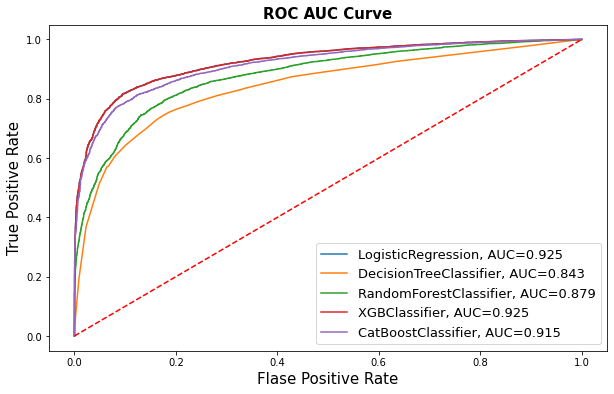

In [ ]:
fig = plt.figure(figsize=(10,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1],'r--')

plt.xlabel("Flase Positive Rate", fontsize=15)

plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC AUC Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

* From the abive metrices we can say that XGB model performance is relatively better then the others

# **Feature Importance:**


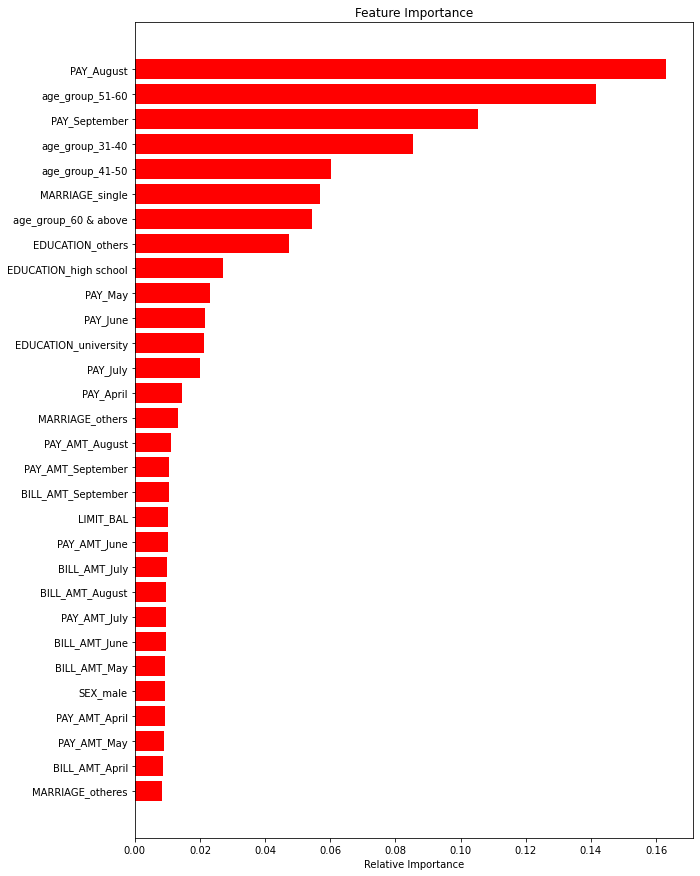

In [ ]:
# Checking feature Importances
features = X_train.columns
importances = xgb_model_cv.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize= (10,15))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

In [ ]:
# list of features
list1 = list([features[i] for i in indices])
list(reversed(list1))[:10]

['PAY_August',
 'age_group_51-60',
 'PAY_September',
 'age_group_31-40',
 'age_group_41-50',
 'MARRIAGE_single',
 'age_group_60 & above',
 'EDUCATION_others',
 'EDUCATION_high school',
 'PAY_May']

## Model explainability useing LIME

In [ ]:
# Installing lime
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import lime
import lime
from lime import lime_tabular

In [ ]:
# Creating a predict function
predict_fn_xgb = lambda x: xgb_model_cv.best_estimator_.predict_proba(x).astype(float)

In [ ]:
# create an explainer 
explainer = lime.lime_tabular.LimeTabularExplainer(training_data = scaled_X_train, random_state= 0, training_labels= X_train.columns, feature_names= X_train.columns)

In [ ]:
# Get the explanation for XGBoost
observation_1 = 0
exp = explainer.explain_instance(scaled_X_test[observation_1], predict_fn_xgb, num_features=10)
exp.show_in_notebook(show_all =False)

# **Conclusions:**
* XG Boost Classifier gives the best recall of 82%.
* The top 10 features crucial in classifying the DEFAULTS are
 **['PAY_August',
 'age_group_51-60',
 'PAY_September',
 'age_group_31-40',
 'age_group_41-50',
 'MARRIAGE_single',
 'age_group_60 & above',
 'EDUCATION_others',
 'EDUCATION_high school',
 'PAY_June']**